# Setting working directory

In [1]:
#Set Working Directory for saving files
import os
print(os.getcwd()) #Current working directory
os.chdir("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook") #Set working directory
print(os.getcwd()) #Check new working directory

C:\Users\aldwi\0ADC_THESIS
C:\Users\aldwi\OneDrive\Desktop\thesis\notebook


https://pycaret.gitbook.io/docs/get-started/functions

# Hybrid Machine Learning using Ensemble Stacking Algorithm for Type II/ Gestational Diabetes Mellitus Detection

In this notebook, the PIMA Indian Diabetes Data (PIDD) and the Frankfurt Germany Diabetes Data (FGDD) will be used.

## Importing the dataset

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\4SMOTEENN_IQR_BRR.csv")
data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
0,1.0,85.0,66.0,29.000000,78.051178,26.6,0.351000,31.0,0
1,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
2,5.0,116.0,74.0,22.240142,107.556504,25.6,0.201000,30.0,0
3,10.0,139.0,80.0,25.748488,152.653911,27.1,0.433877,57.0,0
4,1.0,97.0,66.0,15.000000,140.000000,23.2,0.487000,22.0,0


# Setting up the data preprocessing methods

In [4]:
#Setup the data preprocessing methods
from pycaret.classification import *
s = setup(data,                               #Input data
          target='Outcome',                   #Target Variable
          train_size=0.7,                     #Train-test split 70:30 ratio
          preprocess=False,                   #Turn off automated data preprocessing
          pca=True,                           #Dimensionality Reduction
          data_split_stratify=True,           #Stratified k-fold CV
          fold_strategy='stratifiedkfold',    #Stratified k-fold CV
          fold=10,                            #10-fold CV
          fold_shuffle=True,                  #Shuffle 10-fold CV
          numeric_features=['Pregnancies'],
          session_id=123)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3421, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Transformed Train Set,"(2394, 8)"
9,Transformed Test Set,"(1027, 8)"


In [5]:
from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)
remove_metric('kappa')

# compare_models()
https://pycaret.gitbook.io/docs/get-started/functions/train

In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss,TT (Sec)
et,Extra Trees Classifier,0.9921,0.9997,0.9952,0.9897,0.9924,0.9841,0.2741,0.0500
rf,Random Forest Classifier,0.9908,0.9990,0.9936,0.9889,0.9912,0.9816,0.3174,0.0610
lightgbm,Light Gradient Boosting Machine,0.9904,0.9971,0.9952,0.9866,0.9908,0.9809,0.3318,0.1170
xgboost,Extreme Gradient Boosting,0.9887,0.9968,0.9912,0.9873,0.9892,0.9775,0.3893,0.1800
catboost,CatBoost Classifier,0.9858,0.9972,0.9912,0.9818,0.9865,0.9716,0.4903,0.9950
dt,Decision Tree Classifier,0.9841,0.9842,0.9815,0.9880,0.9847,0.9683,0.5483,0.0090
knn,K Neighbors Classifier,0.9219,0.9848,0.9663,0.8931,0.9280,0.8467,2.6981,0.2010
gbc,Gradient Boosting Classifier,0.9056,0.9696,0.9342,0.8901,0.9116,0.8117,3.2603,0.0440
ada,Ada Boost Classifier,0.8313,0.9182,0.8564,0.8262,0.8407,0.6625,5.8284,0.0360
qda,Quadratic Discriminant Analysis,0.7828,0.8749,0.7706,0.8060,0.7868,0.5677,7.5027,0.0060


In [27]:
viz['Metrics'].unique()

array(['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'MCC',
       'Log Loss'], dtype=object)

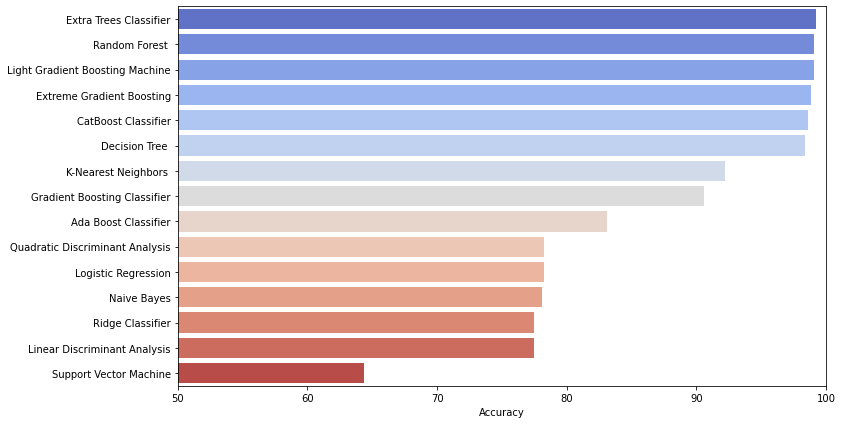

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\Pycaret_accuracy.csv")

plt.figure(figsize=(12,6))
sns.barplot(y=data["Model"], x=data["Accuracy"], palette='coolwarm')
plt.xlim(50,100)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel(None)

plt.savefig("Pycaret_strong_weak_classifer_h.jpg")

In [40]:
viz.head()

,Preprocessing,Model,Metrics,Score
0,False,Decision Tree,Accuracy,0.9179
1,False,Random Forest,Accuracy,0.9179
2,False,Extra Trees Classifier,Accuracy,0.9179
3,False,Extreme Gradient Boosting,Accuracy,0.9122
4,False,Light Gradient Boosting Machine,Accuracy,0.9024


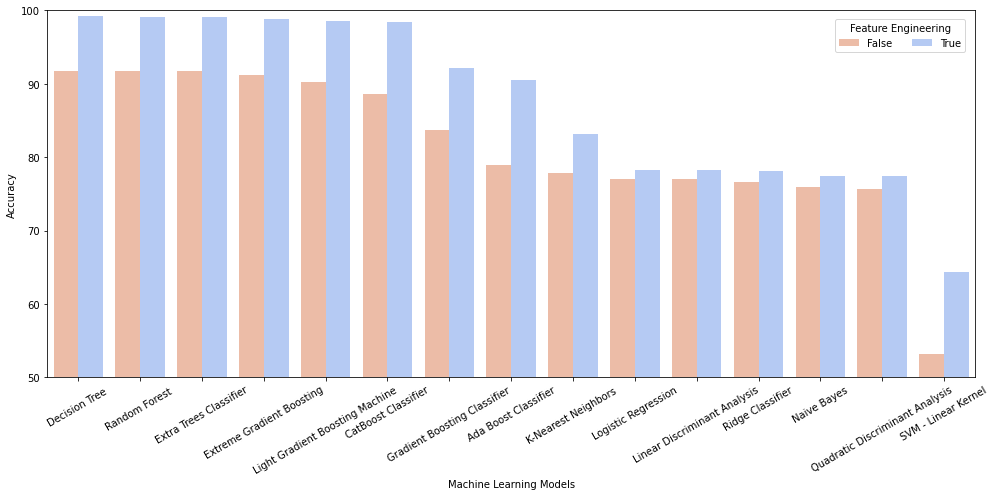

In [105]:
viz = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\pycaret_nopreprocess_featureengineered_comparison_accuracy.csv")
plt.figure(figsize=(14,7))
sns.barplot(data=viz,x='Model',y='Score',hue='Feature Engineering',palette='coolwarm_r')
plt.ylim(50,100)
plt.legend(ncol=2,title='Feature Engineering',bbox_to_anchor=(0.995,0.99))
#t.legend(['Feature Engineering = False','Feature Engineering = True'],palette=['#bed6ea','#316a9a'])
plt.xticks(rotation=30)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.tight_layout()

plt.savefig("increase_accuracy_preprocessing false true.jpg")

In [134]:
top5 = [et,rf,lightgbm,xgboost,catboost]
plt.figure(figsize=(5,5))
plot_model(catboost, plot='boundary',save=True)

'Decision Boundary.png'

# Create Models

In [7]:
et = create_model('et')
rf = create_model('rf')
lightgbm = create_model('lightgbm')
xgboost = create_model('xgboost')
catboost = create_model('catboost')
dt = create_model('dt')
knn = create_model('knn')
gbc = create_model('gbc')
ada = create_model('ada')
qda = create_model('qda')
lr = create_model('lr')
nb = create_model('nb')
ridge = create_model('ridge')
lda = create_model('lda')
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.6375,0.0000,0.9760,0.5922,0.7372,0.3518,12.5206
1,0.6125,0.0000,0.9840,0.5748,0.7257,0.3097,13.3841
2,0.6875,0.0000,0.5680,0.7717,0.6544,0.3960,10.7934
3,0.6458,0.0000,0.4160,0.8125,0.5503,0.3521,12.2325
4,0.4812,0.0000,0.0000,0.0000,0.0000,0.0000,17.9197
5,0.6820,0.0000,0.5081,0.8077,0.6238,0.4024,10.9831
6,0.5481,0.0000,1.0000,0.5345,0.6966,0.1804,15.6078
7,0.7113,0.0000,0.9040,0.6647,0.7661,0.4453,9.9716
8,0.7197,0.0000,0.8880,0.6768,0.7682,0.4554,9.6826
9,0.7113,0.0000,0.5680,0.8256,0.6730,0.4542,9.9715


# Ensemble Learning - Stacking

In [8]:
model = [et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm]

### et_rf_lightgbm_xgboost_catboost [Top 5 strongest]

In [9]:
%%timeit
et_rf_lightgbm_xgboost_catboost = stack_models([et,rf,lightgbm,xgboost,catboost], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9896,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9916,0.9993,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9874,0.9998,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9996,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,0.9999,1.0000,0.9843,0.9921,0.9834,0.2890


2min 21s ± 12.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
et_rf_lightgbm_xgboost_catboost_opt = stack_models([et,rf,lightgbm,xgboost,catboost], meta_model = et,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9896,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9916,0.9993,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9874,0.9998,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9996,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,0.9999,1.0000,0.9843,0.9921,0.9834,0.2890


3min 11s ± 28.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit

et_rf_lightgbm_xgboost_catboost = stack_models([et,rf,lightgbm,xgboost,catboost], meta_model = et, 
                                               choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9896,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9916,0.9993,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9874,0.9998,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9996,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,0.9999,1.0000,0.9843,0.9921,0.9834,0.2890


2min 48s ± 3.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### lr,nb,ridge,lda,svm [Top 5 weak]

In [10]:
%%timeit
lr_nb_ridge_lda_svm = stack_models([lr,nb,ridge,lda,svm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9940,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9975,0.9920,0.9841,0.9880,0.9750,0.4317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9874,0.9994,1.0000,0.9764,0.9880,0.9751,0.4336
5,0.9916,0.9959,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9707,0.9989,0.9677,0.9756,0.9717,0.9414,1.0116
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9999,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9749,0.9997,1.0000,0.9542,0.9766,0.9508,0.8671


2.72 s ± 296 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit

lr_nb_ridge_lda_svm = stack_models([lr,nb,ridge,lda,svm], meta_model = et, optimize='AUC')

In [7]:
%%timeit

lr_nb_ridge_lda_svm = stack_models([lr,nb,ridge,lda,svm], meta_model = et, 
                                               choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9940,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9975,0.9920,0.9841,0.9880,0.9750,0.4317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9874,0.9994,1.0000,0.9764,0.9880,0.9751,0.4336
5,0.9916,0.9959,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9707,0.9989,0.9677,0.9756,0.9717,0.9414,1.0116
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9999,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9749,0.9997,1.0000,0.9542,0.9766,0.9508,0.8671


3.84 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### et,rf,lightgbm,xgboost,catboost, lr,nb,ridge,lda,svm [mixed top5]

In [19]:
%%timeit
et_rf_lightgbm_xgboost_catboost_lr_nb_ridge_lda_svm = stack_models([et,rf,lightgbm,xgboost,catboost, lr,nb,ridge,lda,svm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9894,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9994,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9998,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9997,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


2min ± 5.54 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
et_rf_lightgbm_xgboost_catboost_lr_nb_ridge_lda_svm_opt = stack_models([et,rf,lightgbm,xgboost,catboost, lr,nb,ridge,lda,svm], meta_model = et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9894,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9994,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9998,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9997,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


3min 25s ± 39.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
et_rf_lightgbm_xgboost_catboost_lr_nb_ridge_lda_svm = stack_models([et,rf,lightgbm,xgboost,catboost, lr,nb,ridge,lda,svm], 
                                                                   meta_model = et, choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9894,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9994,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9998,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9997,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


2min 46s ± 2.15 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### dt,knn,gbc,ada,qda [intermediate performance]

In [20]:
%%timeit
dt_knn_gbc_ada_qda = stack_models([dt,knn,gbc,ada,qda], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9979,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9917,0.9967,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1439
4,0.9916,0.9977,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9999,0.9839,0.9919,0.9879,0.9749,0.4335
7,0.9916,0.9994,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9874,0.9985,0.9840,0.9919,0.9880,0.9749,0.4335
9,0.9916,0.9996,1.0000,0.9843,0.9921,0.9834,0.2890


9.14 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
dt_knn_gbc_ada_qda_opt = stack_models([dt,knn,gbc,ada,qda], meta_model = et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9979,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9917,0.9967,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1439
4,0.9916,0.9977,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9999,0.9839,0.9919,0.9879,0.9749,0.4335
7,0.9916,0.9994,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9874,0.9985,0.9840,0.9919,0.9880,0.9749,0.4335
9,0.9916,0.9996,1.0000,0.9843,0.9921,0.9834,0.2890


14.4 s ± 2.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
dt_knn_gbc_ada_qda = stack_models([dt,knn,gbc,ada,qda], meta_model = et, choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9979,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9917,0.9967,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1439
4,0.9916,0.9977,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9999,0.9839,0.9919,0.9879,0.9749,0.4335
7,0.9916,0.9994,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9874,0.9985,0.9840,0.9919,0.9880,0.9749,0.4335
9,0.9916,0.9996,1.0000,0.9843,0.9921,0.9834,0.2890


12.5 s ± 241 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### et, rf, lightgbm [top 3]

In [21]:
%%timeit
et_rf_lightgbm = stack_models([et, rf, lightgbm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9976,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9994,1.0000,0.9841,0.9920,0.9834,0.2890
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9958,0.9999,1.0000,0.9921,0.9960,0.9916,0.1445


11.9 s ± 224 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
et_rf_lightgbm_opt = stack_models([et, rf, lightgbm], meta_model = et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9976,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9994,1.0000,0.9841,0.9920,0.9834,0.2890
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9958,0.9999,1.0000,0.9921,0.9960,0.9916,0.1445


20.7 s ± 3.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
et_rf_lightgbm = stack_models([et, rf, lightgbm], meta_model = et, choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9976,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9917,0.9999,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9994,1.0000,0.9841,0.9920,0.9834,0.2890
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9958,0.9999,1.0000,0.9921,0.9960,0.9916,0.1445


16.3 s ± 622 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### ridge,lda,svm [top 3]

In [22]:
%%timeit
ridge_lda_svm = stack_models([ridge,lda,svm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9968,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9994,0.9920,0.9841,0.9880,0.9750,0.4317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
4,0.9833,0.9991,0.9919,0.9762,0.9840,0.9666,0.5781
5,0.9916,0.9983,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9791,0.9990,0.9839,0.9760,0.9799,0.9581,0.7226
7,0.9916,1.0000,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9958,0.9999,1.0000,0.9921,0.9960,0.9916,0.1445
9,0.9874,1.0000,1.0000,0.9766,0.9881,0.9751,0.4336


1.52 s ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
ridge_lda_svm = stack_models([ridge,lda,svm], meta_model = et, optimize='AUC')

In [11]:
%%timeit
ridge_lda_svm_opt = stack_models([ridge,lda,svm], meta_model = et, choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9968,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9875,0.9994,0.9920,0.9841,0.9880,0.9750,0.4317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
4,0.9833,0.9991,0.9919,0.9762,0.9840,0.9666,0.5781
5,0.9916,0.9983,0.9919,0.9919,0.9919,0.9832,0.2890
6,0.9791,0.9990,0.9839,0.9760,0.9799,0.9581,0.7226
7,0.9916,1.0000,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9958,0.9999,1.0000,0.9921,0.9960,0.9916,0.1445
9,0.9874,1.0000,1.0000,0.9766,0.9881,0.9751,0.4336


2.28 s ± 128 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### et, rf, lightgbm, ridge,lda,svm  [mixed top 3]

In [23]:
%%timeit
et_rf_lightgbm_ridge_lda_svm = stack_models([et, rf, lightgbm, ridge,lda,svm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9974,0.9760,0.9839,0.9799,0.9583,0.7196
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,0.9999,0.9920,1.0000,0.9960,0.9917,0.1439
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9996,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9998,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


12.2 s ± 337 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
et_rf_lightgbm_ridge_lda_svm_opt = stack_models([et, rf, lightgbm, ridge,lda,svm], meta_model = et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9974,0.9760,0.9839,0.9799,0.9583,0.7196
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,0.9999,0.9920,1.0000,0.9960,0.9917,0.1439
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9996,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9998,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


19.5 s ± 2.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
et_rf_lightgbm_ridge_lda_svm = stack_models([et, rf, lightgbm, ridge,lda,svm], meta_model = et,
                                            choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9974,0.9760,0.9839,0.9799,0.9583,0.7196
1,0.9875,0.9997,0.9920,0.9841,0.9880,0.9750,0.4317
2,0.9958,0.9999,1.0000,0.9921,0.9960,0.9917,0.1439
3,0.9958,0.9999,0.9920,1.0000,0.9960,0.9917,0.1439
4,0.9916,0.9997,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9874,0.9996,0.9919,0.9840,0.9880,0.9749,0.4335
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9998,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


18.9 s ± 229 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm [TOP 10 weak]

In [24]:
%%timeit
dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm = stack_models([dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9986,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9917,0.9880,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9992,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,1.0000,0.9839,1.0000,0.9919,0.9834,0.2890
7,0.9916,0.9996,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9791,0.9940,0.9840,0.9762,0.9801,0.9581,0.7226
9,0.9916,0.9996,1.0000,0.9843,0.9921,0.9834,0.2890


10.2 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm_opt = stack_models([dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm], meta_model = et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9986,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9917,0.9880,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9992,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,1.0000,0.9839,1.0000,0.9919,0.9834,0.2890
7,0.9916,0.9996,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9791,0.9940,0.9840,0.9762,0.9801,0.9581,0.7226
9,0.9916,0.9996,1.0000,0.9843,0.9921,0.9834,0.2890


14.9 s ± 164 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm = stack_models([dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm], meta_model = et, 
                                               choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9792,0.9986,0.9840,0.9762,0.9801,0.9583,0.7196
1,0.9917,0.9880,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9992,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9996,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,1.0000,0.9839,1.0000,0.9919,0.9834,0.2890
7,0.9916,0.9996,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9791,0.9940,0.9840,0.9762,0.9801,0.9581,0.7226
9,0.9916,0.9996,1.0000,0.9843,0.9921,0.9834,0.2890


16.3 s ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda [TOP 10 strong]

In [25]:
%%timeit
et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda], 
                                                                  meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9989,0.9840,0.9840,0.9840,0.9666,0.5757
1,0.9917,0.9999,1.0000,0.9843,0.9921,0.9834,0.2878
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9999,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9999,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9997,0.9919,0.9919,0.9919,0.9832,0.2890
7,0.9916,1.0000,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


2min 9s ± 5.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda_opt_acc = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda], meta_model = et, optimize='Accuracy',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9989,0.9840,0.9840,0.9840,0.9666,0.5757
1,0.9917,0.9999,1.0000,0.9843,0.9921,0.9834,0.2878
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9999,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9999,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9997,0.9919,0.9919,0.9919,0.9832,0.2890
7,0.9916,1.0000,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:58:40
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss


KeyboardInterrupt: 

In [ ]:
%%timeit

et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda], 
                                                                  meta_model = et, choose_better=True, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9989,0.9840,0.9840,0.9840,0.9666,0.5757
1,0.9917,0.9999,1.0000,0.9843,0.9921,0.9834,0.2878
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9999,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9999,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9997,0.9919,0.9919,0.9919,0.9832,0.2890
7,0.9916,1.0000,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:50:57
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss


### et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm [ALL]

In [26]:
%%timeit
et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm], meta_model = et)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9990,0.9840,0.9840,0.9840,0.9666,0.5757
1,0.9917,0.9992,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9999,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9997,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9999,0.9919,0.9919,0.9919,0.9832,0.2890
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9791,1.0000,1.0000,0.9615,0.9804,0.9588,0.7226


2min 16s ± 8.78 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm_opt = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm], meta_model = et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9990,0.9840,0.9840,0.9840,0.9666,0.5757
1,0.9917,0.9992,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9958,1.0000,1.0000,0.9921,0.9960,0.9917,0.1439
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9999,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9997,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9999,0.9919,0.9919,0.9919,0.9832,0.2890
7,0.9958,1.0000,0.9920,1.0000,0.9960,0.9917,0.1445
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9791,1.0000,1.0000,0.9615,0.9804,0.9588,0.7226


2min 54s ± 3.11 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm], meta_model = et, 
                                               choose_better=True, optimize='AUC')

In [ ]:
#et,rf,lightgbm,xgboost,catboost [Top 5 strongest]
#lr,nb,ridge,lda,svm [Top 5 weak]
#et,rf,lightgbm,xgboost,catboost, lr,nb,ridge,lda,svm [mixed top5]
#dt,knn,gbc,ada,qda [intermediate performance]
#et, rf, lightgbm [top 3]
#ridge,lda,svm [top 3]
#et, rf, lightgbm, ridge,lda,svm  [mixed top 3]
#dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm [TOP 10 weak]
#et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda [TOP 10 strong]
#et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda,lr,nb,ridge,lda,svm [ALL]

#nb,lr,knn,dt,rf,svm [common ML algo]
#et,svm,rf,lda,lightgbm [mixed]
#ridge, lightgbm,nb,xgboost,lr [mixed]
#et, lightgbm,catboost,knn, ada,lr,ridge,svm [alternate - mixed]
#rf,xgboost,dt,gbc,qda,nb,lda [alternate -mixed]

In [24]:
plot_model(et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda)

NameError: name 'et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda_opt' is not defined

In [30]:
stacking = [et_rf_lightgbm_xgboost_catboost,#Top 5 Strongest
            lr_nb_ridge_lda_svm, #Top 5 Weakest
            et_rf_lightgbm_xgboost_catboost_lr_nb_ridge_lda_svm, #Combining Top 5 Strong and Weak
            dt_knn_gbc_ada_qda, #Top 5 Moderate
            et_rf_lightgbm, #Top 3 Strongest
            ridge_lda_svm, #Top 3 Weakest
            et_rf_lightgbm_ridge_lda_svm, # #Combining Top 3 Strong and Weak
            dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm, #Top 10 Strongest
            et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda, #Top 10 Weakest
            et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda_lr_nb_ridge_lda_svm] #ALL

NameError: name 'et_rf_lightgbm_xgboost_catboost_lr_nb_ridge_lda_svm' is not defined

In [ ]:
for i in stacking:
    print("\n----------------------------------------------------------------------------------\n  ", i)
print("\n----------------------------------------------------------------------------------")

In [34]:
?stack_models

In [35]:
et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda = stack_models([et,rf,lightgbm,xgboost,catboost,dt,knn,gbc,ada,qda],meta_model = et)
print(et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9989,0.9840,0.9840,0.9840,0.9666,0.5757
1,0.9917,0.9999,1.0000,0.9843,0.9921,0.9834,0.2878
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9916,0.9999,1.0000,0.9841,0.9920,0.9834,0.2890
5,0.9958,0.9999,1.0000,0.9920,0.9960,0.9917,0.1445
6,0.9916,0.9997,0.9919,0.9919,0.9919,0.9832,0.2890
7,0.9916,1.0000,0.9840,1.0000,0.9919,0.9834,0.2890
8,0.9916,0.9995,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9916,1.0000,1.0000,0.9843,0.9921,0.9834,0.2890


StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0.

In [43]:
evaluate_model(et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda)

,Parameters
cv,"StratifiedKFold(n_splits=10, random_state=123,..."
estimators,"[('et', ExtraTreesClassifier(bootstrap=False, ..."
final_estimator,"ExtraTreesClassifier(bootstrap=False, ccp_alph..."
n_jobs,-1
passthrough,True
stack_method,auto
verbose,0


In [46]:
plots=['auc','threshold','pr','confusion_matrix','error','class_report','boundary','rfe','learning','manifold','calibration','vc','dimension','feature','feature_all','parameter','gain','tree']
for i in plots:
    plot_model(et_rf_lightgbm_xgboost_catboost_dt_knn_gbc_ada_qda, plot=i,save=True)

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [47]:
help(stack_models) 

Help on function stack_models in module pycaret.classification:

stack_models(estimator_list: list, meta_model=None, fold: Union[int, Any, NoneType] = None, round: int = 4, method: str = 'auto', restack: bool = True, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True) -> Any
    This function trains a meta model over select estimators passed in 
    the ``estimator_list`` parameter. The output of this function is a 
    score grid with CV scores by fold. Metrics evaluated during CV can 
    be accessed using the ``get_metrics`` function. Custom metrics 
    can be added or removed using ``add_metric`` and ``remove_metric`` 
    function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> top3 = compare_models(

In [ ]:
et = create_model('et')
rf = create_model('rf')
lightgbm = create_model('lightgbm')
xgboost = create_model('xgboost')
catboost = create_model('catboost')
dt = create_model('dt')
knn = create_model('knn')
gbc = create_model('gbc')
ada = create_model('ada')
qda = create_model('qda')
lr = create_model('lr')
nb = create_model('nb')
ridge = create_model('ridge')
lda = create_model('lda')
svm = create_model('svm')

In [56]:
X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

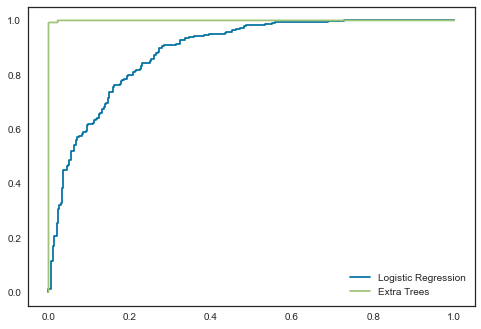

In [61]:
from sklearn import metrics

plt.style.use("seaborn-white")

lr_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_pred)
plt.plot(fpr,tpr,label="Logistic Regression")


et_pred = et.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, et_pred)
plt.plot(fpr,tpr,label="Extra Trees")

plt.legend()

<br><br><br><br><br><br><br><br><br><br>
# Hyperparameter Fine-Tuning

In [29]:
top5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9921,0.9997,0.9952,0.9897,0.9924,0.9841,0.9841,0.0520
rf,Random Forest Classifier,0.9908,0.9990,0.9936,0.9889,0.9912,0.9816,0.9816,0.0610
lightgbm,Light Gradient Boosting Machine,0.9904,0.9971,0.9952,0.9866,0.9908,0.9807,0.9809,0.0860
xgboost,Extreme Gradient Boosting,0.9887,0.9968,0.9912,0.9873,0.9892,0.9774,0.9775,0.0350
catboost,CatBoost Classifier,0.9858,0.9972,0.9912,0.9818,0.9865,0.9715,0.9716,1.0870
dt,Decision Tree Classifier,0.9841,0.9842,0.9815,0.9880,0.9847,0.9682,0.9683,0.0060
knn,K Neighbors Classifier,0.9219,0.9848,0.9663,0.8931,0.9280,0.8429,0.8467,0.0080
gbc,Gradient Boosting Classifier,0.9056,0.9696,0.9342,0.8901,0.9116,0.8105,0.8117,0.0420
ada,Ada Boost Classifier,0.8313,0.9182,0.8564,0.8262,0.8407,0.6614,0.6625,0.0220
qda,Quadratic Discriminant Analysis,0.7828,0.8749,0.7706,0.8060,0.7868,0.5656,0.5677,0.0050


In [60]:
plot_model(catboost,save=True)

'AUC.png'

In [ ]:
et = create_model('et')
rf = create_model('rf')
lightgbm = create_model('lightgbm')
xgboost = create_model('xgboost')
catboost = create_model('catboost')

# tune_model() 

In [61]:
tuned_et = tune_model(et, optimize = 'AUC',choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.8417,0.9382,0.8880,0.8222,0.8538,0.6841,5.4687
1,0.8792,0.9542,0.8880,0.8810,0.8845,0.7579,4.1735
2,0.8208,0.9209,0.8400,0.8203,0.8300,0.6409,6.1883
3,0.8708,0.9526,0.9120,0.8507,0.8803,0.7425,4.4613
4,0.8577,0.9293,0.8952,0.8409,0.8672,0.7160,4.9135
5,0.8536,0.9296,0.8629,0.8560,0.8594,0.7066,5.0580
6,0.8661,0.9407,0.9355,0.8286,0.8788,0.7372,4.6245
7,0.8912,0.9470,0.9040,0.8898,0.8968,0.7819,3.7574
8,0.8745,0.9579,0.8800,0.8800,0.8800,0.7484,4.3355
9,0.8787,0.9497,0.8960,0.8750,0.8854,0.7568,4.1910


In [62]:
tuned_rf = tune_model(rf, optimize = 'AUC',choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.8708,0.9464,0.9120,0.8507,0.8803,0.7425,4.4613
1,0.9000,0.9702,0.9280,0.8855,0.9063,0.8002,3.4539
2,0.8750,0.9418,0.8960,0.8682,0.8819,0.7496,4.3174
3,0.8917,0.9683,0.9440,0.8613,0.9008,0.7860,3.7418
4,0.8870,0.9433,0.9355,0.8593,0.8958,0.7763,3.9019
5,0.8828,0.9415,0.9274,0.8582,0.8915,0.7673,4.0464
6,0.8870,0.9574,0.9355,0.8593,0.8958,0.7763,3.9019
7,0.9079,0.9718,0.9440,0.8872,0.9147,0.8168,3.1794
8,0.8996,0.9752,0.9200,0.8915,0.9055,0.7989,3.4684
9,0.8745,0.9692,0.9120,0.8571,0.8837,0.7493,4.3355


In [63]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC',choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9833,0.9855,0.9920,0.9764,0.9841,0.9667,0.5757
1,0.9917,0.9862,1.0000,0.9843,0.9921,0.9834,0.2878
2,0.9875,0.9990,0.9920,0.9841,0.9880,0.9750,0.4317
3,0.9917,0.9950,0.9920,0.9920,0.9920,0.9833,0.2878
4,0.9874,0.9985,0.9919,0.9840,0.9880,0.9749,0.4335
5,0.9916,0.9995,1.0000,0.9841,0.9920,0.9834,0.2890
6,0.9833,0.9956,0.9839,0.9839,0.9839,0.9665,0.5781
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
8,0.9916,0.9978,0.9920,0.9920,0.9920,0.9832,0.2890
9,0.9874,0.9989,0.9840,0.9919,0.9880,0.9749,0.4335


In [64]:
tuned_xgboost = tune_model(xgboost, optimize = 'AUC',choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9750,0.9841,0.9760,0.9760,0.9760,0.9499,0.8635
1,0.9792,0.9962,0.9920,0.9688,0.9802,0.9585,0.7196
2,0.9708,0.9967,0.9840,0.9609,0.9723,0.9418,1.0074
3,0.9875,0.9996,0.9840,0.9919,0.9880,0.9750,0.4317
4,0.9707,0.9941,1.0000,0.9466,0.9725,0.9428,1.0116
5,0.9791,0.9998,1.0000,0.9612,0.9802,0.9589,0.7226
6,0.9623,0.9920,0.9677,0.9600,0.9639,0.9246,1.3006
7,0.9833,0.9997,0.9840,0.9840,0.9840,0.9665,0.5781
8,0.9791,0.9945,0.9680,0.9918,0.9798,0.9584,0.7226
9,0.9749,0.9955,0.9920,0.9612,0.9764,0.9501,0.8671


In [65]:
tuned_catboost = tune_model(catboost, optimize = 'AUC',choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,MCC,Log Loss
0,0.9042,0.9736,0.9440,0.8806,0.9112,0.8097,3.3100
1,0.9167,0.9824,0.9360,0.9070,0.9213,0.8333,2.8783
2,0.9042,0.9663,0.9200,0.8984,0.9091,0.8081,3.3100
3,0.9375,0.9841,0.9680,0.9167,0.9416,0.8760,2.1587
4,0.9163,0.9729,0.9435,0.9000,0.9213,0.8331,2.8903
5,0.9247,0.9709,0.9516,0.9077,0.9291,0.8500,2.6013
6,0.9247,0.9816,0.9516,0.9077,0.9291,0.8500,2.6013
7,0.9372,0.9889,0.9760,0.9104,0.9421,0.8763,2.1677
8,0.9582,0.9895,0.9680,0.9528,0.9603,0.9162,1.4452
9,0.9121,0.9879,0.9520,0.8881,0.9189,0.8257,3.0348


In [75]:
top5 = [et,rf,lightgbm,xgboost,catboost]
tuned_top5 = [tuned_et,tuned_rf,tuned_lightgbm,tuned_xgboost,tuned_catboost]

for i in top5:
    print("\n----------------------------------------------------------------------------------\n")
    print("  ",i)

print("\n----------------------------------------------------------------------------------")

for i in tuned_top5:
    print("\n----------------------------------------------------------------------------------\n")
    print("  ",i)
print("\n----------------------------------------------------------------------------------")


----------------------------------------------------------------------------------

   ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

----------------------------------------------------------------------------------

   RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fra